In [ ]:
from google.colab import files
uploaded = files.upload()

KeyboardInterrupt: 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
df = pd.read_csv("Path of csv file")
df.head()

,pH,Temperature,TDS,Turbidity,Conductivity,Potability
0,7.810890,29.094485,864,31,3.174906,0
1,9.827500,28.608289,61,78,2.724560,0
2,9.061979,27.928583,367,79,0.667234,0
3,8.595305,29.441385,641,53,2.977905,0
4,7.046065,29.054194,265,19,0.372372,0


In [ ]:
df.columns

Index(['pH', 'Temperature', 'TDS', 'Turbidity', 'Conductivity', 'Potability'], dtype='object')

In [ ]:
df.describe()

,pH,Temperature,TDS,Turbidity,Conductivity,Potability
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,8.234512,28.445854,500.160000,36.628000,1.572360,0.102000
std,1.042866,0.856480,269.040279,24.528451,0.938554,0.302951
min,6.517716,27.013896,52.000000,0.000000,0.010298,0.000000
25%,7.344479,27.687298,275.000000,14.000000,0.687654,0.000000
50%,8.264680,28.415465,464.000000,36.000000,1.561752,0.000000
75%,9.141782,29.179010,737.250000,59.000000,2.423722,0.000000
max,9.975377,29.999153,998.000000,79.000000,3.194712,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   pH            500 non-null    float64
 1   Temperature   500 non-null    float64
 2   TDS           500 non-null    int64  
 3   Turbidity     500 non-null    int64  
 4   Conductivity  500 non-null    float64
 5   Potability    500 non-null    int64  
dtypes: float64(3), int64(3)
memory usage: 23.6 KB


In [ ]:
df.isnull().sum()

pH              0
Temperature     0
TDS             0
Turbidity       0
Conductivity    0
Potability      0
dtype: int64

<Axes: >

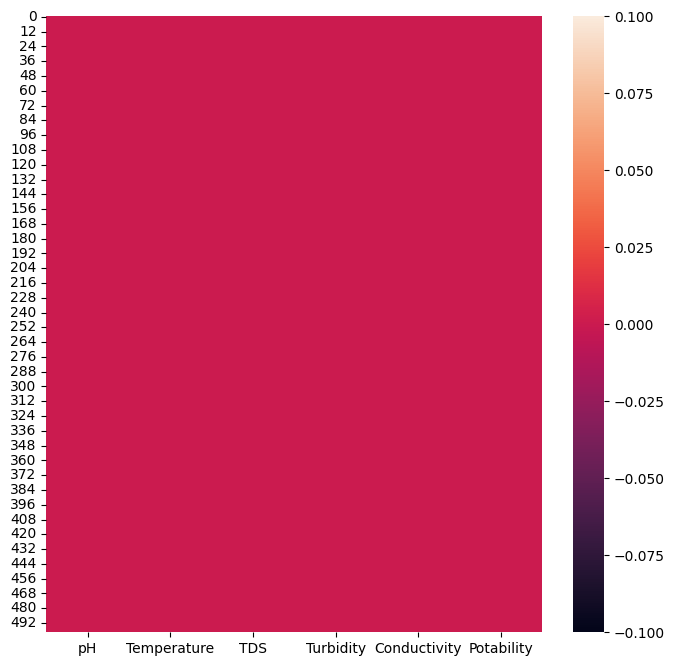

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(df.isnull())

<Axes: >

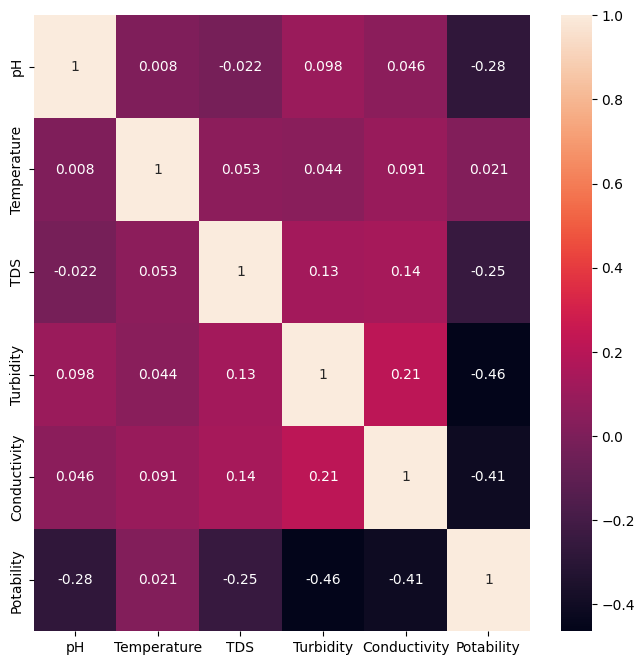

In [ ]:
plt.figure(figsize= (8,8))
sns.heatmap(df.corr(),annot= True)

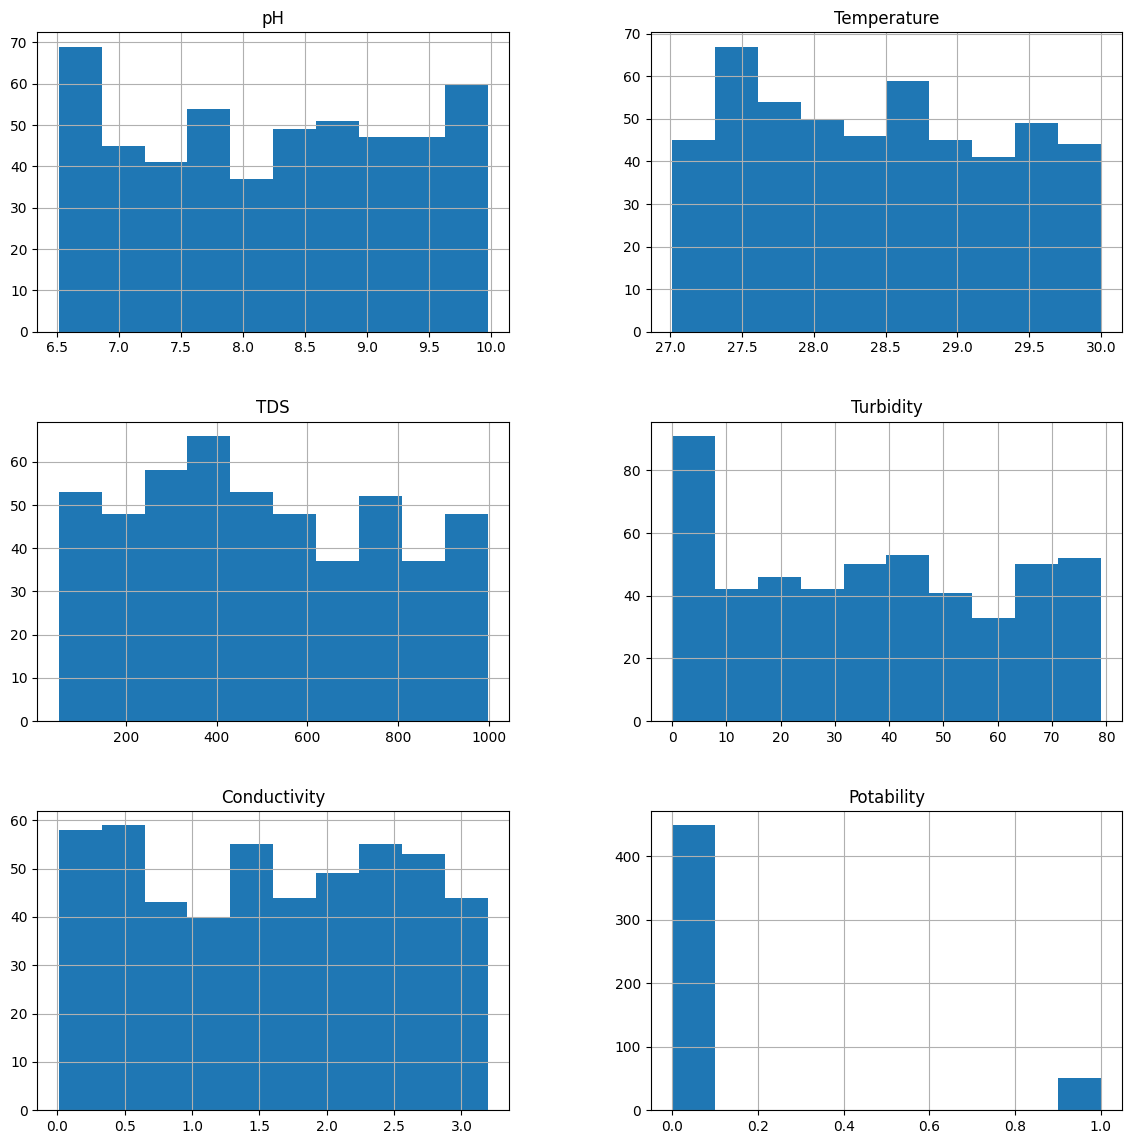

In [ ]:
df.hist(figsize=(14,14))
plt.show()

# **TRAINING**

In [ ]:
x = df.drop("Potability",axis=1)
y = df["Potability"]

In [ ]:
x.shape , y.shape

((500, 5), (500,))

In [ ]:
scaler = StandardScaler()
x = scaler.fit_transform(x)
x

array([[-0.40661528,  0.75807991,  1.35371695, -0.22967763,  1.70917279],
       [ 1.52903969,  0.18984393, -1.63395541,  1.68838359,  1.22886283],
       [ 0.79424947, -0.60455487, -0.49544016,  1.72919341, -0.96534952],
       ...,
       [-1.40373216, -1.21010975,  0.50913211, -0.63777576,  0.44219824],
       [ 1.60859425,  1.64191135,  1.62904417,  0.21923032, -0.47435244],
       [ 1.64828984, -0.12603308, -1.50745372, -0.92344445,  1.1948108 ]])

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [ ]:
x_train.shape , x_test.shape

((400, 5), (100, 5))

In [ ]:
y_train.shape , y_test.shape

((400,), (100,))

# **LOGISTIC REGRESSION**

In [ ]:
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression()


In [ ]:
model_lr.fit(x_train,y_train)

LogisticRegression()

In [ ]:
pred_lr = model_lr.predict(x_test)

In [ ]:
pred_lr

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
accuracy_score_lr = accuracy_score(y_test,pred_lr)*100
accuracy_score_lr

98.0

# **SVM**

In [ ]:
from sklearn.svm import SVC

model_svm = SVC(kernel="sigmoid") #Linear,Polynomial and rbf also can be used to define kernel

In [ ]:
model_svm.fit(x_train,y_train)

SVC(kernel='sigmoid')

In [ ]:
pred_svm = model_svm.predict(x_test)

In [ ]:
pred_svm

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
accuracy_score_svm = accuracy_score(y_test,pred_svm)*100
accuracy_score_svm

91.0

# **ADA BOOST**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

model_ada = AdaBoostClassifier(n_estimators=200,learning_rate=0.01)

In [ ]:
model_ada.fit(x_train,y_train)

AdaBoostClassifier(learning_rate=0.01, n_estimators=200)

In [ ]:
pred_ada = model_ada.predict(x_test)

In [ ]:
pred_ada

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
accuracy_score_ada = accuracy_score(y_test,pred_ada)*100
accuracy_score_ada

100.0